In [1]:
from autoPyTorch import (AutoNetClassification, HyperparameterSearchSpaceUpdates)
# Other imports for later usage
import pandas as pd
import numpy as np
import os as os
import openml
import json

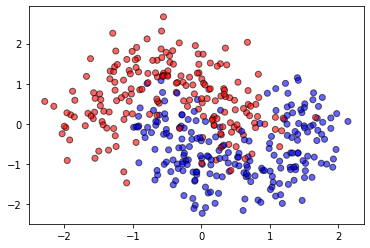

In [2]:
# Generate moon dataset
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh

X, y = make_moons(n_samples=1000, noise=0.3, random_state=0)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')
plt.show()

In [3]:
## Load configurations
cocktail_config = None
pn_config = None
with open('.\\logs_moon_cocktail\\results_fit.json', 'r') as jf:
    cocktail_config = json.load(jf)
with open('.\\logs_moon_plain\\results_fit.json', 'r') as jf:
    pn_config = json.load(jf)

print('Cocktail Config: ', cocktail_config)
print('Plain Network Config: ', pn_config)

Cocktail Config:  {'optimized_hyperparameter_config': {'CreateDataLoader:batch_size': 128, 'Imputation:strategy': 'median', 'InitializationSelector:initialization_method': 'default', 'InitializationSelector:initializer:initialize_bias': 'No', 'LearningrateSchedulerSelector:lr_scheduler': 'plateau', 'LossModuleSelector:loss_module': 'cross_entropy_weighted', 'NetworkSelector:network': 'shapedresnet', 'NetworkSelector:use_lookahead': False, 'NetworkSelector:use_se': True, 'NetworkSelector:use_swa': False, 'NormalizationStrategySelector:normalization_strategy': 'standardize', 'OptimizerSelector:optimizer': 'sgd', 'PreprocessorSelector:preprocessor': 'none', 'ResamplingStrategySelector:over_sampling_method': 'none', 'ResamplingStrategySelector:target_size_strategy': 'upsample', 'ResamplingStrategySelector:under_sampling_method': 'none', 'TrainNode:batch_loss_computation_technique': 'standard', 'LearningrateSchedulerSelector:plateau:factor': 0.36187247916558557, 'LearningrateSchedulerSelect

In [4]:
search_space_updates_plain = HyperparameterSearchSpaceUpdates()

# Fixed architecture space plain network
search_space_updates_plain.append(
    node_name="NetworkSelector",
    hyperparameter="shapedresnet:max_units",
    value_range=[512],
    log=False,
)
search_space_updates_plain.append(
    node_name="NetworkSelector",
    hyperparameter="shapedresnet:resnet_shape",
    value_range=["brick"],
    log=False,
)
search_space_updates_plain.append(
    node_name="NetworkSelector",
    hyperparameter="shapedresnet:num_groups",
    value_range=[4],
    log=False,
)
search_space_updates_plain.append(
    node_name="NetworkSelector",
    hyperparameter="shapedresnet:blocks_per_group",
    value_range=[2],
    log=False,
)
search_space_updates_plain.append(
    node_name="CreateDataLoader",
    hyperparameter="batch_size",
    value_range=[128],
    log=False,
)
search_space_updates_plain.append(
    node_name="NetworkSelector",
    hyperparameter="shapedresnet:use_dropout",
    value_range=[False],
    log=False,
)
search_space_updates_plain.append(
    node_name="NetworkSelector",
    hyperparameter="shapedresnet:use_shake_shake",
    value_range=[False],
    log=False,
)
search_space_updates_plain.append(
    node_name="NetworkSelector",
    hyperparameter="shapedresnet:use_shake_drop",
    value_range=[False],
    log=False,
)
search_space_updates_plain.append(
    node_name="NetworkSelector",
    hyperparameter="shapedresnet:use_batch_normalization",
    value_range=[False],
    log=False,
)
search_space_updates_plain.append(
    node_name="NetworkSelector",
    hyperparameter="shapedresnet:use_skip_connection",
    value_range=[False],
    log=False,
)
search_space_updates_plain.append(
    node_name="OptimizerSelector",
    hyperparameter="sgd:use_weight_decay",
    value_range=[False],
    log=False,
)
search_space_updates_plain.append(
    node_name="OptimizerSelector",
    hyperparameter="adamw:use_weight_decay",
    value_range=[False],
    log=False,
)
autonet_plain = AutoNetClassification(
   'C:\\Users\\monum\\Desktop\\Project\\Auto-PyTorch\\no_regularization',
    validation_split=0.25,
    random_seed=1234,
    batch_loss_computation_techniques=['standard'],
    use_lookahead=[False],
    use_swa=[False],
    use_se=[False],
    use_adversarial_training=[False],
    hyperparameter_search_space_updates=search_space_updates_plain,
)

C:\Users\monum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
# Get the current configuration as dict
current_configuration = autonet_plain.get_current_autonet_config()

# Get the ConfigSpace object with all hyperparameters, conditions, default values and default ranges
hyperparameter_search_space = autonet_plain.get_hyperparameter_search_space()

# Print all possible configuration options 
#autonet.print_help()

print(current_configuration)

print(hyperparameter_search_space)

{'optimize_metric': 'balanced_accuracy', 'budget_type': 'time', 'max_budget': 90.0, 'min_budget': 30.0, 'validation_split': 0.25, 'memory_limit_mb': 4000, 'max_runtime': 10800.0, 'log_level': 'debug', 'networks': ['shapedresnet'], 'embeddings': ['none'], 'lr_scheduler': ['cosine_annealing', 'plateau', 'exponential'], 'over_sampling_methods': ['none'], 'target_size_strategies': ['none', 'upsample', 'median'], 'preprocessors': ['none'], 'imputation_strategies': ['median'], 'initialization_methods': ['default'], 'loss_modules': ['cross_entropy_weighted'], 'normalization_strategies': ['standardize'], 'optimizer': ['sgd', 'adamw'], 'use_tensorboard_logger': False, 'cuda': False, 'use_pynisher': False, 'random_seed': 1234, 'batch_loss_computation_techniques': ['standard'], 'use_lookahead': [False], 'use_swa': [False], 'use_se': [False], 'use_adversarial_training': [False], 'hyperparameter_search_space_updates': <autoPyTorch.utils.hyperparameter_search_space_update.HyperparameterSearchSpaceUp

In [9]:
results_refit = autonet_plain.refit(X_train,
                              y_train,
                              hyperparameter_config=pn_config['optimized_hyperparameter_config'],
                              autonet_config=autonet_plain.get_current_autonet_config(),
                              budget=pn_config['budget'])


Wrapping up training!, Final models count:  0


In [10]:
print(results_refit)

{'optimized_hyperparameter_config': {'CreateDataLoader:batch_size': 128, 'Imputation:strategy': 'median', 'InitializationSelector:initialization_method': 'default', 'InitializationSelector:initializer:initialize_bias': 'Zero', 'LearningrateSchedulerSelector:lr_scheduler': 'plateau', 'LossModuleSelector:loss_module': 'cross_entropy_weighted', 'NetworkSelector:network': 'shapedresnet', 'NetworkSelector:use_lookahead': False, 'NetworkSelector:use_se': False, 'NetworkSelector:use_swa': False, 'NormalizationStrategySelector:normalization_strategy': 'standardize', 'OptimizerSelector:optimizer': 'adamw', 'PreprocessorSelector:preprocessor': 'none', 'ResamplingStrategySelector:over_sampling_method': 'none', 'ResamplingStrategySelector:target_size_strategy': 'none', 'ResamplingStrategySelector:under_sampling_method': 'none', 'TrainNode:batch_loss_computation_technique': 'standard', 'LearningrateSchedulerSelector:plateau:factor': 0.1452150236211876, 'LearningrateSchedulerSelector:plateau:patienc

In [12]:
search_space_updates_cocktail = HyperparameterSearchSpaceUpdates()

# Fixed architecture space cocktail
search_space_updates_cocktail.append(
    node_name="NetworkSelector",
    hyperparameter="shapedresnet:max_units",
    value_range=[512],
    log=False,
)
search_space_updates_cocktail.append(
    node_name="NetworkSelector",
    hyperparameter="shapedresnet:resnet_shape",
    value_range=["brick"],
    log=False,
)
search_space_updates_cocktail.append(
    node_name="NetworkSelector",
    hyperparameter="shapedresnet:num_groups",
    value_range=[4],
    log=False,
)
search_space_updates_cocktail.append(
    node_name="NetworkSelector",
    hyperparameter="shapedresnet:blocks_per_group",
    value_range=[2],
    log=False,
)
search_space_updates_cocktail.append(
    node_name="NetworkSelector",
    hyperparameter="shapedresnet:use_shake_shake",
    value_range=[False, True],
    log=False,
)
search_space_updates_cocktail.append(
    node_name="CreateDataLoader",
    hyperparameter="batch_size",
    value_range=[128],
    log=False,
)
search_space_updates_cocktail.append(
    node_name="NetworkSelector",
    hyperparameter="shapedresnet:use_dropout",
    value_range=[True, False],
    log=False,
)
search_space_updates_cocktail.append(
    node_name="NetworkSelector",
    hyperparameter="shapedresnet:use_shake_shake",
    value_range=[True, False],
    log=False,
)
search_space_updates_cocktail.append(
    node_name="NetworkSelector",
    hyperparameter="shapedresnet:use_shake_drop",
    value_range=[True, False],
    log=False,
)
search_space_updates_cocktail.append(
    node_name="NetworkSelector",
    hyperparameter="shapedresnet:use_batch_normalization",
    value_range=[True, False],
    log=False,
)
search_space_updates_cocktail.append(
    node_name="NetworkSelector",
    hyperparameter="shapedresnet:use_skip_connection",
    value_range=[True, False],
    log=False,
)

autonet_cocktail = AutoNetClassification(
    'C:\\Users\\monum\\Desktop\\Project\\Auto-PyTorch\\regularization',
    random_seed=1234,
    validation_split=0.25,
    hyperparameter_search_space_updates=search_space_updates_cocktail,
)

In [13]:
results_refit2 = autonet_cocktail.refit(X_train,
                              y_train,
                              hyperparameter_config=cocktail_config['optimized_hyperparameter_config'],
                              autonet_config=autonet_cocktail.get_current_autonet_config(),
                              budget=cocktail_config['budget'])
print(results_refit2)

lastk:  8
1-th SE update triggered
Scheduler :<class 'torch.optim.lr_scheduler.ReduceLROnPlateau'>
2-th SE update triggered
Scheduler :<class 'torch.optim.lr_scheduler.ReduceLROnPlateau'>
3-th SE update triggered
Scheduler :<class 'torch.optim.lr_scheduler.ReduceLROnPlateau'>
4-th SE update triggered
Scheduler :<class 'torch.optim.lr_scheduler.ReduceLROnPlateau'>
5-th SE update triggered
Scheduler :<class 'torch.optim.lr_scheduler.ReduceLROnPlateau'>
6-th SE update triggered
Scheduler :<class 'torch.optim.lr_scheduler.ReduceLROnPlateau'>
7-th SE update triggered
Scheduler :<class 'torch.optim.lr_scheduler.ReduceLROnPlateau'>
8-th SE update triggered
Scheduler :<class 'torch.optim.lr_scheduler.ReduceLROnPlateau'>
9-th SE update triggered
Scheduler :<class 'torch.optim.lr_scheduler.ReduceLROnPlateau'>
10-th SE update triggered
Scheduler :<class 'torch.optim.lr_scheduler.ReduceLROnPlateau'>
11-th SE update triggered
Scheduler :<class 'torch.optim.lr_scheduler.ReduceLROnPlateau'>
12-th SE 

Accuracy score 0.8975546684743039
(9975, 2)
(400,)
(9975,)


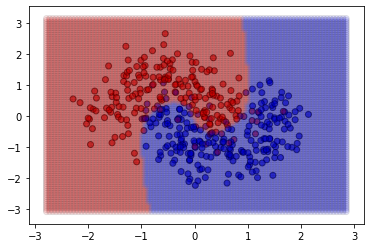

In [11]:
score = autonet_plain.score(X_test=X_test, Y_test=y_test)
print("Accuracy score", score)

xx_new, yy_new = np.meshgrid(np.arange(x_min, x_max, 0.06),
                         np.arange(y_min, y_max, 0.06))
pred_dataset = np.c_[xx_new.ravel(), yy_new.ravel()]
print(pred_dataset.shape)
pred = autonet_plain.predict(pred_dataset)
print(y_test.shape)
print(pred.squeeze().shape)
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')
plt.scatter(xx_new.ravel(), yy_new.ravel(), c=pred.squeeze(), cmap=cm_bright, alpha=0.1,
           edgecolors='k')
plt.show()

Accuracy score 0.8965755316210992
(9975, 2)
(400,)
(9975,)


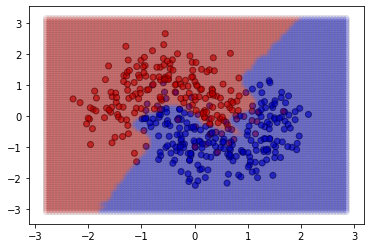

In [14]:
score = autonet_cocktail.score(X_test=X_test, Y_test=y_test)
print("Accuracy score", score)

xx_new, yy_new = np.meshgrid(np.arange(x_min, x_max, 0.06),
                         np.arange(y_min, y_max, 0.06))
pred_dataset = np.c_[xx_new.ravel(), yy_new.ravel()]
print(pred_dataset.shape)
pred = autonet_cocktail.predict(pred_dataset)
print(y_test.shape)
print(pred.squeeze().shape)
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')
plt.scatter(xx_new.ravel(), yy_new.ravel(), c=pred.squeeze(), cmap=cm_bright, alpha=0.1,
           edgecolors='k')
plt.show()

In [19]:
sum_val = 0.0
from itertools import product
pred_plain = autonet_plain.predict(X_test)
pred_cocktail = autonet_cocktail.predict(X_test)

mat_diff_plain = pred_plain - pred_plain.swapaxes(1,2)
mat_diff_cocktail = pred_cocktail - pred_cocktail.swapaxes(1, 2)

print('Index: ', )

(400, 2)


C:\Users\monum\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  after removing the cwd from sys.path.


(320000, 2)
